In [150]:
import numpy as np
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt

import os 

In [151]:
data = pd.read_csv("50_StartUp.csv")
df = data.copy()
# Display the dataframe
print(df)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [152]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [153]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [154]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

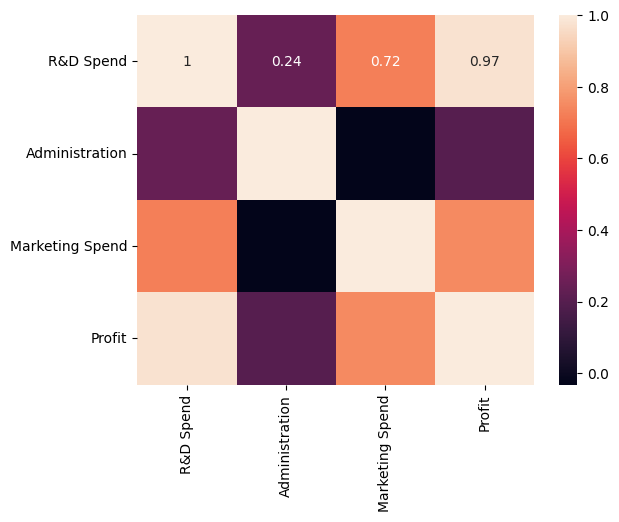

In [155]:
sns.heatmap(corr,annot=True)

<Axes: xlabel='R&D Spend', ylabel='Profit'>

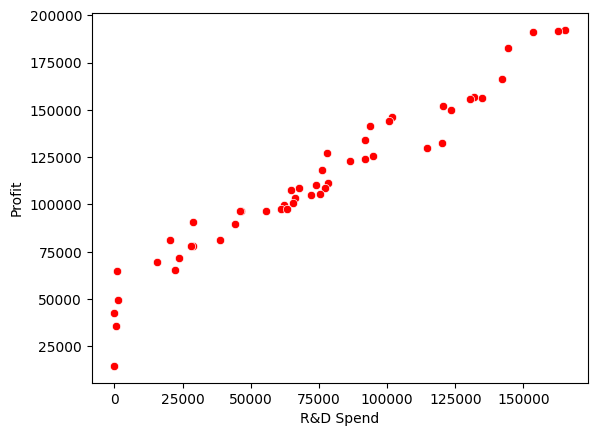

In [156]:
sns.scatterplot(x="R&D Spend",y="Profit",color='red',data=df)

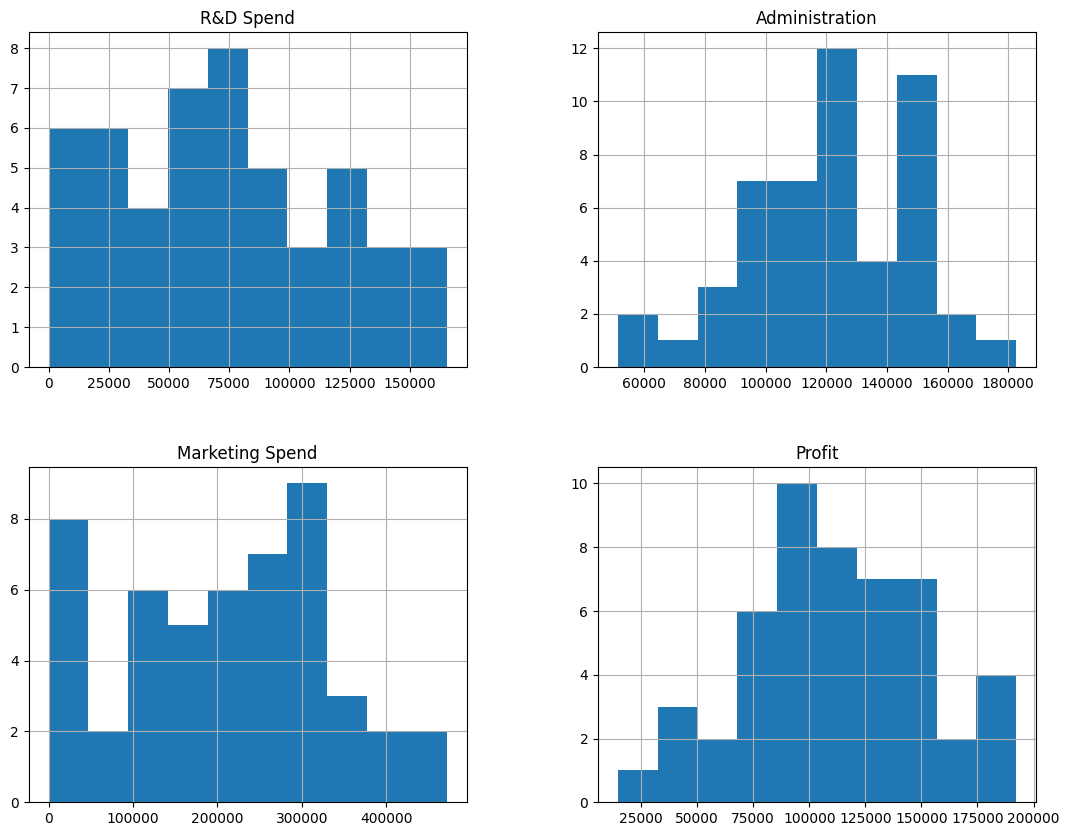

In [157]:
df.hist(figsize=(13,10))
plt.show()

In [158]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [159]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [160]:
df_State = pd.get_dummies(df["State"],dtype=np.number)
df_State

c:\Users\Struggler\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\common.py:1691: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


,California,Florida,New York
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
5,0.0,0.0,1.0
6,1.0,0.0,0.0
7,0.0,1.0,0.0
8,0.0,0.0,1.0
9,1.0,0.0,0.0


In [161]:
df_dummies = pd.get_dummies(df["State"],prefix="State",dtype=int)
df_dummies

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [162]:
df = pd.concat([df,df_dummies],axis=1)


In [163]:
df = df.drop(["State_Florida"], axis=1)
df

,R&D Spend,Administration,Marketing Spend,State,Profit,State_California,State_New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0
5,131876.90,99814.71,362861.36,New York,156991.12,0,1
6,134615.46,147198.87,127716.82,California,156122.51,1,0
7,130298.13,145530.06,323876.68,Florida,155752.60,0,0
8,120542.52,148718.95,311613.29,New York,152211.77,0,1
9,123334.88,108679.17,304981.62,California,149759.96,1,0


In [164]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_California,State_New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0


In [165]:
# delete the state column from the dataframe
df = df.drop(["State"], axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,0,0


In [166]:
x = df.drop("Profit", axis= 1)
y = df["Profit"]
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [167]:
x

,R&D Spend,Administration,Marketing Spend,State_California,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,0,0
5,131876.90,99814.71,362861.36,0,1
6,134615.46,147198.87,127716.82,1,0
7,130298.13,145530.06,323876.68,0,0
8,120542.52,148718.95,311613.29,0,1
9,123334.88,108679.17,304981.62,1,0


In [168]:
from sklearn.model_selection import train_test_split

In [169]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=35)

In [170]:
x_train

,R&D Spend,Administration,Marketing Spend,State_California,State_New York
48,542.05,51743.15,0.00,0,1
34,46426.07,157693.92,210797.67,1,0
2,153441.51,101145.55,407934.54,0,0
20,76253.86,113867.30,298664.47,1,0
37,44069.95,51283.14,197029.42,1,0
10,101913.08,110594.11,229160.95,0,0
1,162597.70,151377.59,443898.53,1,0
36,28663.76,127056.21,201126.82,0,0
16,78013.11,121597.55,264346.06,1,0
6,134615.46,147198.87,127716.82,1,0


In [171]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [172]:
model = lm.fit(x_train,y_train)

In [173]:
y_pred = model.predict(x_test)
y_pred

array([ 82650.91171141, 114969.39758648, 118676.50929825,  96544.92731097,
       100747.90907156,  57717.39681268,  77491.15050368, 129634.19513027,
       102260.23338706, 113685.43462948,  88383.71117127, 177651.49084482,
       133416.99793513,  99051.42621284, 155021.60473219])

In [174]:
df = pd.DataFrame({"y_test":y_test,"y_pred":y_pred,"diff between y_pred and y_test":abs(y_pred-y_test)})
df

,y_test,y_pred,diff between y_pred and y_test
39,81005.76,82650.911711,1645.151711
26,105733.54,114969.397586,9235.857586
22,110352.25,118676.509298,8324.259298
31,97483.56,96544.927311,938.632689
29,101004.64,100747.909072,256.730928
43,69758.98,57717.396813,12041.583187
41,77798.83,77491.150504,307.679496
17,125370.37,129634.195130,4263.825130
25,107404.34,102260.233387,5144.106613
23,108733.99,113685.434629,4951.444629


In [175]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_pred)
MAE

6657.417321576695

In [176]:
RMSE = np.sqrt(MSE)
RMSE

81.5929979935576

In [177]:
model.score(x_train,y_train)

0.956142267350216

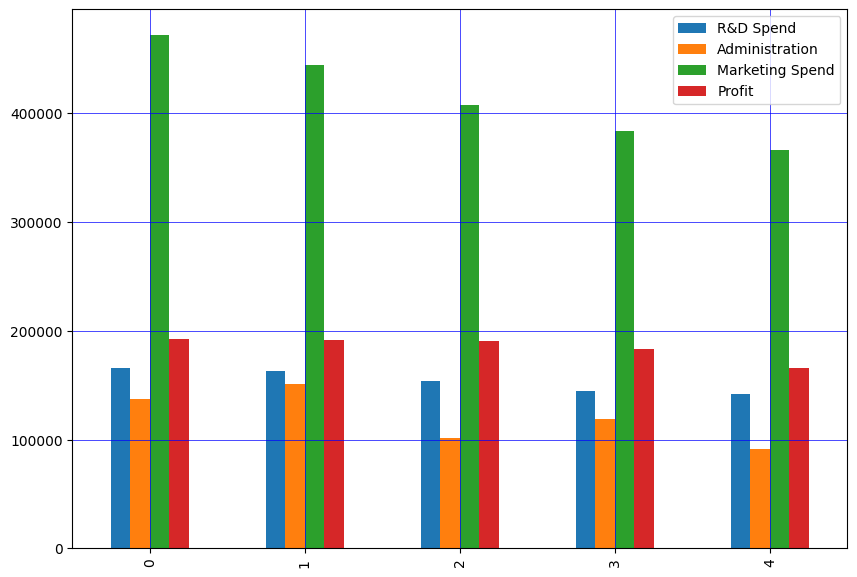

In [178]:
#bar plot for first 5 companies 
df1 = data.head()
df1.plot(kind="bar",figsize=(10,7))
plt.grid(which="major",linestyle="-",linewidth='0.5',color='blue')
plt.show()

In [179]:
import statsmodels.api as sm
stmodel = sm.OLS(y,x).fit()

In [180]:
stmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              765.9
Date:                Sat, 27 Jul 2024   Prob (F-statistic):                    2.49e-42
Time:                        08:13:19   Log-Likelihood:                         -543.87
No. Observations:                  50   AIC:                                      1098.
Df Residuals:                      45   BIC:                                      1107.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7217      0.064     11.260      0.000       0.593       0.851
Administration       0.2847      0.038      7.465      0.000       0.208       0.362
Marketing Spend      0.0830      0.022      3.833      0.000       0.039       0.127
State_California  7720.4710   4539.299      1.701      0.096   -1422.146    1.69e+04
State_New York    7126.6916   4530.146      1.573      0.123   -1997.491    1.63e+04
==============================================================================
Omnibus:                        0.862   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.929
Skew:                          -0.212   Prob(JB):                        0.628
Kurtosis:                       2.484   Cond. No.                     8.02e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 27 Jul 2024   Prob (F-statistic):           1.34e-27
Time:                        08:13:19   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  -198.7888   3371.007     -0.059      0.953   -6992.607    6595.030
State_New York    -240.6758   3338.857     -0.072      0.943   -6969.701    6488.349
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [182]:
x=x.drop(['State_California'],axis=1)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 27 Jul 2024   Prob (F-statistic):           8.50e-29
Time:                        08:13:19   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.018e+04   6747.623      7.437      0.000    3.66e+04    6.38e+04
R&D Spend           0.8059      0.046     17.571      0.000       0.714       0.898
Administration     -0.0269      0.052     -0.521      0.605      -0.131       0.077
Marketing Spend     0.0271      0.017      1.625      0.111      -0.007       0.061
State_New York   -136.5042   2801.719     -0.049      0.961   -5779.456    5506.447
==============================================================================
Omnibus:                       14.892   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.665
Skew:                          -0.949   Prob(JB):                     1.97e-05
Kurtosis:                       5.608   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [183]:
x=x.drop(['State_New York'],axis=1)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 27 Jul 2024   Prob (F-statistic):           4.53e-30
Time:                        08:13:19   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R&D Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [184]:
x = x.drop(['Administration'],axis=1)
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 27 Jul 2024   Prob (F-statistic):           2.16e-31
Time:                        08:13:19   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [185]:
x=x.drop(['Marketing Spend'],axis=1)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 27 Jul 2024   Prob (F-statistic):           3.50e-32
Time:                        08:14:24   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R&D Spend      0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Data Standardization


In [186]:
from sklearn.preprocessing import StandardScaler
data = [[0,61],[0,62],[1,63],[1,64]]
s = StandardScaler()
s.fit_transform(data)

array([[-1.        , -1.34164079],
       [-1.        , -0.4472136 ],
       [ 1.        ,  0.4472136 ],
       [ 1.        ,  1.34164079]])

In [187]:
from sklearn.preprocessing import MinMaxScaler
data = [[0,61],[0,62],[1,63],[1,64]]
s = MinMaxScaler()
s.fit_transform(data)

array([[0.        , 0.        ],
       [0.        , 0.33333333],
       [1.        , 0.66666667],
       [1.        , 1.        ]])

In [188]:
from sklearn.preprocessing import RobustScaler
data = [[0,61],[0,62],[1,63],[1,64]]
s = RobustScaler()
s.fit_transform(data)

array([[-0.5       , -1.        ],
       [-0.5       , -0.33333333],
       [ 0.5       ,  0.33333333],
       [ 0.5       ,  1.        ]])

In [189]:
from sklearn.preprocessing import Normalizer
data = [[0,61],[0,62],[1,63],[1,64]]
s = Normalizer()
s.fit_transform(data)

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.01587102, 0.99987405],
       [0.01562309, 0.99987795]])